In [1]:
#1.Make a virtual environment to remove OMP_NUM_THREADS error
import os

active_environment = os.environ.get('CONDA_DEFAULT_ENV')


if active_environment == 'myenv':
    print(f'You are in the "{active_environment}" virtual environment.')
else:
    print(f'You are not in the "myenv" virtual environment.')


You are in the "myenv" virtual environment.


In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
import os
omp_num_threads = os.environ.get('OMP_NUM_THREADS')
if omp_num_threads is not None:
    print(f'OMP_NUM_THREADS is set to: {omp_num_threads}')
else:
    print('OMP_NUM_THREADS is not set.')


OMP_NUM_THREADS is set to: 1


In [ ]:
#2.Import the needed libraries in the virtual environment.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

file_path = 'D:\\DandBAproj\\Iris.csv'
Iris = pd.read_csv(file_path)
warnings.filterwarnings('ignore')

In [77]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [79]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#3 Data visualization using Pair Plot with Regression Lines,Violin plots,Correlation Heatmap

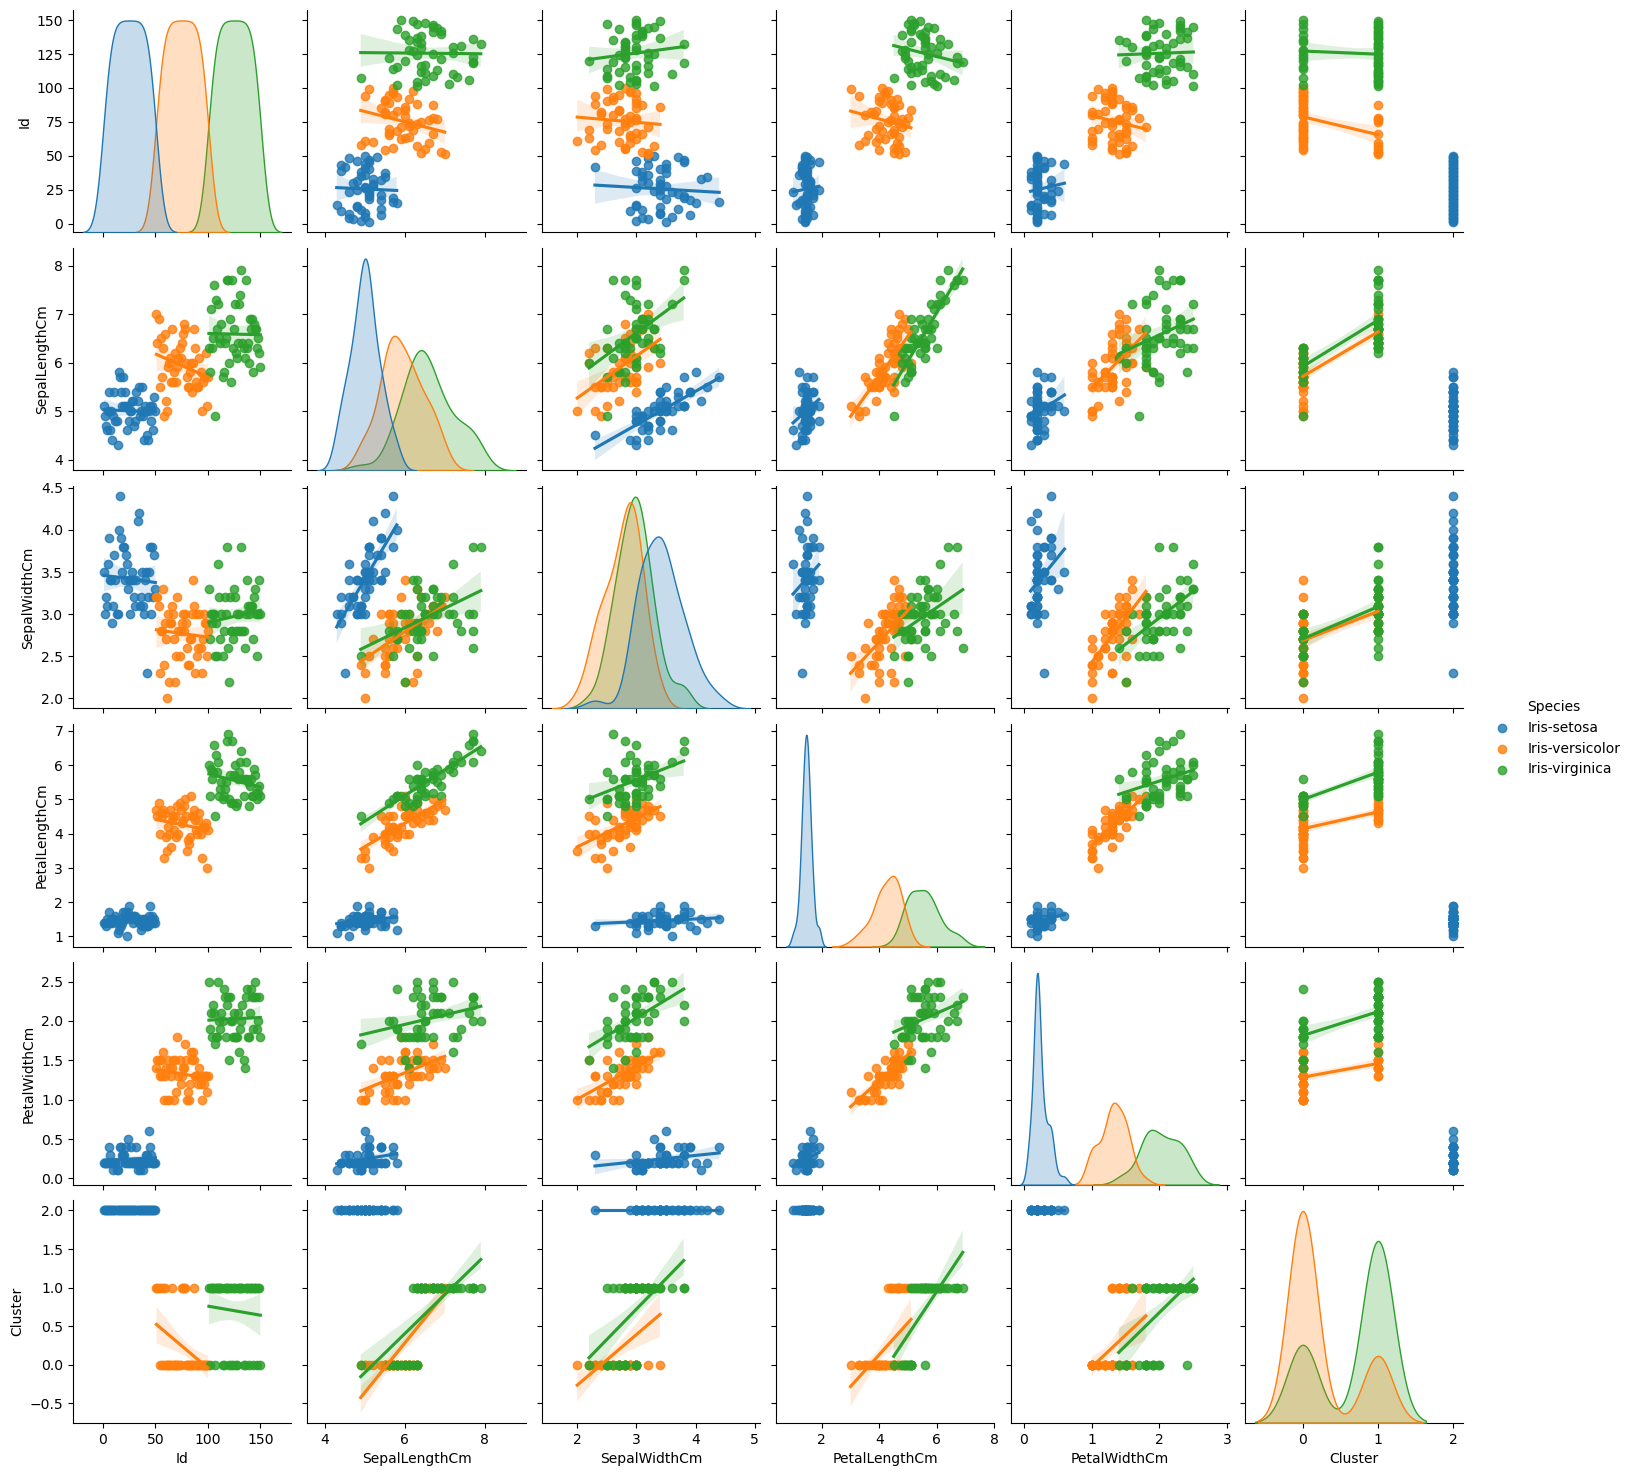

In [99]:
sns.pairplot(Iris, hue="Species", kind="reg")


In [ ]:
#Violin Plots

Text(0.5, 1.0, 'Petal Width by Species')

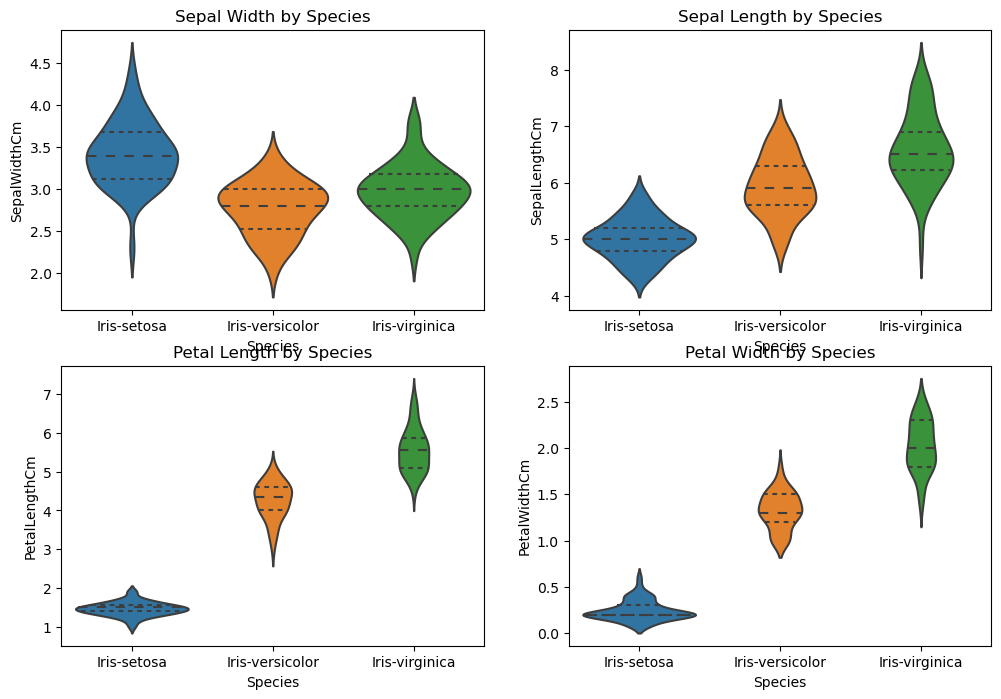

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.violinplot(data=Iris, x="Species", y="SepalWidthCm", inner="quart", ax=axes[0, 0])
axes[0, 0].set_title("Sepal Width by Species")
sns.violinplot(data=Iris, x="Species", y="SepalLengthCm", inner="quart", ax=axes[0, 1])
axes[0, 1].set_title("Sepal Length by Species")
sns.violinplot(data=Iris, x="Species", y="PetalLengthCm", inner="quart", ax=axes[1, 0])
axes[1, 0].set_title("Petal Length by Species")
sns.violinplot(data=Iris, x="Species", y="PetalWidthCm", inner="quart", ax=axes[1, 1])
axes[1, 1].set_title("Petal Width by Species")


In [ ]:
#Correlation Heatmap

<Axes: >

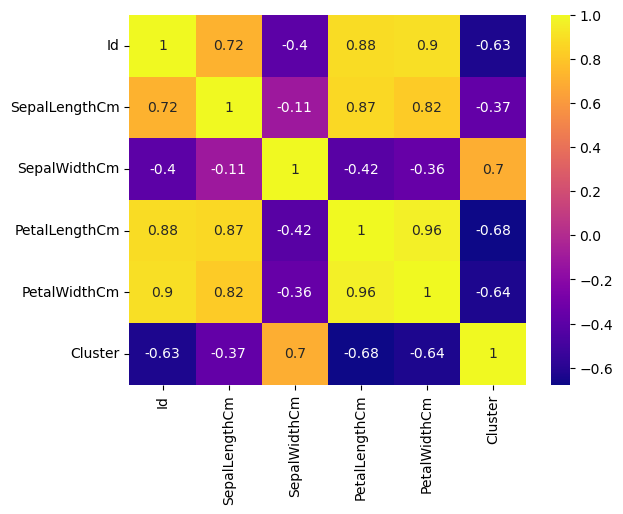

In [96]:
correlation_matrix = Iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="plasma")


In [ ]:
#Finding value of K using Elbow method,Hierarchial clustering dendogram,Silhouette analysis

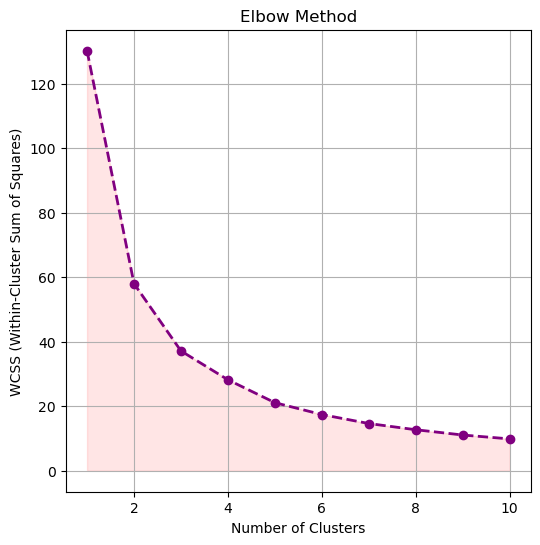

In [86]:
X = Iris.iloc[:, [1, 2]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple', linewidth=2)
plt.fill_between(range(1, 11), wcss, color='red', alpha=0.1)  
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

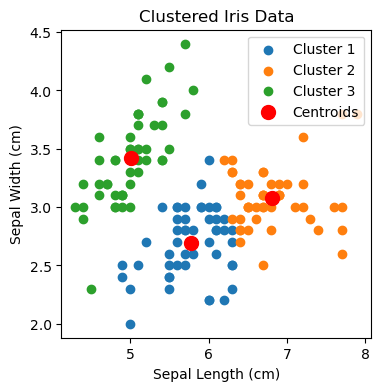

In [89]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
Iris['Cluster'] = kmeans.labels_

plt.figure(figsize=(4,4))
for i in range(optimal_clusters):
    plt.scatter(X[Iris['Cluster'] == i, 0], X[Iris['Cluster'] == i, 1], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clustered Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

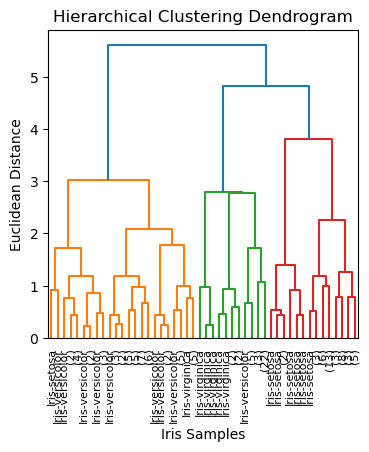

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dendrogram_linkage = linkage(X_scaled, method='complete')
plt.figure(figsize=(4, 4))
dendrogram(dendrogram_linkage, p=5, truncate_mode='level', orientation='top', labels=Iris['Species'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Samples')
plt.ylabel('Euclidean Distance')
plt.show()

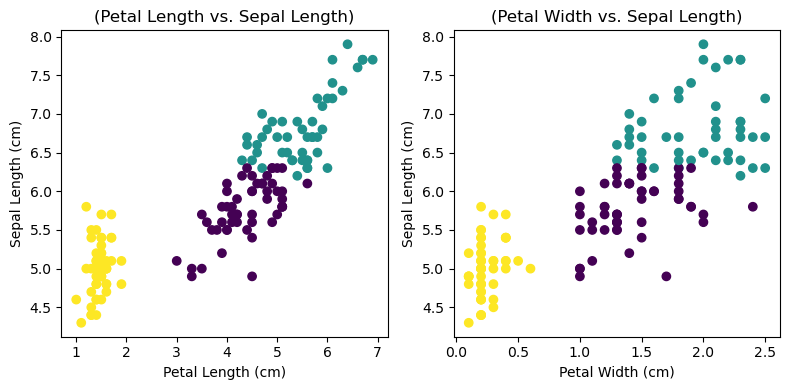

In [105]:
X = Iris[['PetalWidthCm', 'SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5) 
labels = dbscan.fit_predict(X_scaled)
data['Cluster'] = labels
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.scatter(Iris['PetalLengthCm'], Iris['SepalLengthCm'], c=Iris['Cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('(Petal Length vs. Sepal Length)')
plt.subplot(1, 2, 2)
plt.scatter(Iris['PetalWidthCm'], Iris['SepalLengthCm'], c=Iris['Cluster'], cmap='viridis')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('(Petal Width vs. Sepal Length)')
plt.tight_layout()
plt.show()